# Monty Hall Problem
The Monty Hall problem is a famous brain teaser, loosely based on the American television game show Let's Make a Deal and named after its original host, [Monty Hall]("https://en.wikipedia.org/wiki/Monty_Hall"). The problem was originally posed in a letter by Steve Selvin to the American Statistician in 1975. It was also mentioned in the [hollywood movie 21]("https://www.youtube.com/watch?v=YReov4c3taI"). 


## Problem Statement
The Problem can be described as follows-

<blockquote> Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a car; behind the others, goats. You pick a door, say No. 1, and the host, who knows what's behind the doors, opens another door, say No. 3, which has a goat. He then says to you, "Do you want to pick door No. 2?" Is it to your advantage to switch your choice? </blockquote>


## Solution
The straight forward answer is, 'You switch your choice'. Switching your choice gives you a higher probability of winning. This answer though counter intuitive is based on simple probability concepts.

## Explanation
There are three doors in the beginning, one with a car behind it and other two with a goat. When you select a door randomly,  the probability of selecting the door with the car behind it is 1/3, while probability of selecting the door with a goat behind it is 2/3. 

After you have selected a door, the host eliminates a door out of the other two. Now you have two options, you can either stick with your earlier choice, or you can switch your choice. If the door you had originally selected has a car behind it, sticking with that door will win you the car. But if the door you had originally selected has a goat behind it, then switching your choice will win you the car.

As shown earlier, probability of selecting a door with the car behind it is 1/3, while probability of selecting a door with a goat behind it is 2/3. Hence probability of winning when you stick with your earlier choice is 1/3, while probability of winning when you switch your choice is 2/3.

Let's try running a simulation and verify the answer.

## Simulation

The following Python code sets up a simulation of the game. In this simulation, 
1. Three doors are set up.
2. A car is randomly assigned to a door, and other two are kept empty.
3. A door is selected randomly as contestant's choice.
4. Out of the other two doors, a door not containing the car is eliminated.
5. Contestant's choice is switched.
6. Door corresponding to the contestant's final choice is opened. If the door contains the car, contestant wins.

In [1]:
from random import randint

def setupDoors() :
    #Set up three doors, assign car randomly to one of the doors, car is represented by *
    doors = dict.fromkeys([1, 2, 3])
    doors[randint(1,3)] = "*"
    return doors

def chooseDoor():
    #Select a random door out of the three doors
    return randint(1,3)

def eliminateDoor(doors, selectedDoor):
    #Eliminate a door which isn't selected by the player and doesn't have a car behind it
    eligibleDoors = []
    for key, value in doors.items():
        if key != selectedDoor and value != "*":
            eligibleDoors.append(key)
    if len(eligibleDoors) == 1:
        doors.pop(eligibleDoors[0])
    else:
        doors.pop(eligibleDoors[randint(0,1)])
    return doors

def switchDoor(doors, selectedDoor):
    #Switch the player's choice
    for key in doors.iteritems():
        if key[0] != selectedDoor:
            return key[0]

def openDoor(doors, selectedDoor):
    #Open the player's final selection
    if doors[selectedDoor] == "*":
        return 1
    else:
        return 0
    
def playGame(output):
    doors = setupDoors()
    if(output):
        print "Initial doors = " 
        print doors
    
    doorChoice = chooseDoor()
    if (output):
        print "\nPlayer's choice" 
        print doorChoice
    
    newDoors = eliminateDoor(doors, doorChoice)
    if(output):
        print "\nDoors after eliminating one door = " 
        print newDoors
    
    doorChoice = switchDoor(doors, doorChoice)
    if(output):
        print "\nFinal choice" 
        print doorChoice
    
    result = openDoor(newDoors, doorChoice)
    if(output):
        if(result == 1):
            print "\nPlayer Won"
            return
        else:
            print "\nPlayer Lost"
            return
    return result

Let's run one iteration of the game and check the output.

In [3]:
playGame(output = True)

Initial doors = 
{1: '*', 2: None, 3: None}

Player's choice
1

Doors after eliminating one door = 
{1: '*', 3: None}

Final choice
3

Player Lost


Running a single game proves nothing. In order to achieve statistically significant results, let's run a simulation of 1000 iterations, calculating number of games won in 100 games. 

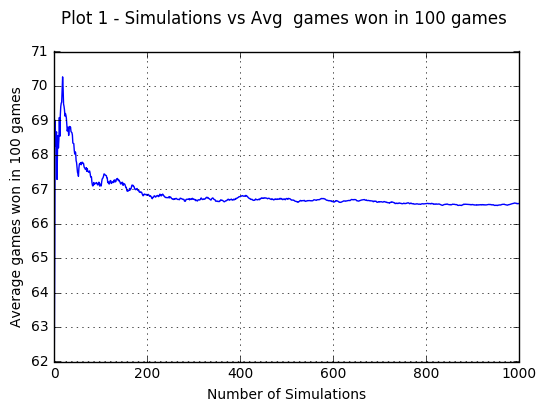

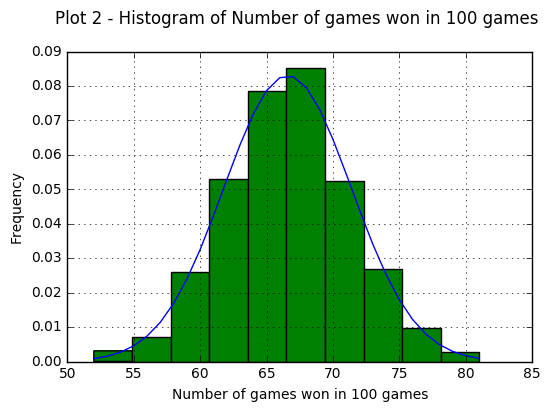

In [11]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

def runHundredGames():
    result = []
    for i in xrange(100):
        result.append(playGame(output = False))
    return sum(result)
    
def runSimulation():
    finalResult = []
    avgResult = []
    for k in xrange(1000):
        finalResult.append(runHundredGames())
        avgResult.append((sum(finalResult)/float(len(finalResult))))
    
    plt.plot(range(1000), avgResult)
    plt.grid(True)
    plt.title("Plot 1 - Simulations vs Avg  games won in 100 games \n")
    plt.ylabel("Average games won in 100 games")
    plt.xlabel("Number of Simulations")
    plt.show()
    
    
    #Fitting a normal distribution 
    sFinalResult = sorted(finalResult)
    normalDistFit = stats.norm.pdf(sFinalResult, np.mean(sFinalResult), np.std(sFinalResult))
    
    plt.plot(sFinalResult ,normalDistFit)
    plt.hist(finalResult,normed=True)
    plt.grid(True)
    plt.title("Plot 2 - Histogram of Number of games won in 100 games \n")
    plt.ylabel("Frequency")
    plt.xlabel("Number of games won in 100 games")
    plt.show()
    
    return finalResult

result = runSimulation()



## Simulation Analysis

Plot 1 shows the relation between 'Avg number of games won in 100' and 'Number of simulations'. As number of simulations increase the average number of games won stabilizes near 66.66.

Plot 2 is a histogram of Number of won in 100 games,  the blue curve is a Normal distribution with Mean = Simulation Mean and Standard Deviation = Simulation Standard Deviation. The histogram is centered around 66.
